## 逻辑回归

逻辑回归是一种用于分类问题的机器学习算法。其基本原理如下：

**一、数学模型**

逻辑回归使用逻辑函数（也称为 sigmoid 函数）来建立输入特征与输出类别之间的关系。sigmoid 函数的表达式为：$g(z)=\frac{1}{1 + e^{-z}}$，其中$z=\omega^T x + b$，$\omega$是权重向量，$x$是输入特征向量，$b$是偏置项。

逻辑回归的输出是一个介于 0 和 1 之间的概率值，表示样本属于某一类别（通常是正类）的可能性。如果输出概率大于某个阈值（通常是 0.5），则将样本预测为正类；否则预测为负类。

**二、参数估计**

1. 似然函数
   - 逻辑回归通过最大似然估计来确定模型的参数$\omega$和$b$。
   - 对于给定的训练数据集$\{(x_1,y_1),(x_2,y_2),\cdots,(x_n,y_n)\}$，其中$x_i$是输入特征向量，$y_i\in\{0,1\}$是对应的类别标签。
   - 假设样本之间相互独立，那么整个数据集的似然函数可以表示为：$L(\omega,b)=\prod_{i=1}^{n}P(y_i|x_i;\omega,b)$，其中$P(y_i|x_i;\omega,b)$是在给定参数$\omega$和$b$的情况下，样本$x_i$属于类别$y_i$的概率。

2. 对数似然函数
   - 为了方便计算，通常对似然函数取对数，得到对数似然函数：$l(\omega,b)=\sum_{i=1}^{n}y_i\log P(y_i|x_i;\omega,b)+(1-y_i)\log(1-P(y_i|x_i;\omega,b))$。

3. 优化算法
   - 通过最大化对数似然函数来估计参数$\omega$和$b$。常用的优化算法有梯度下降法、牛顿法等。
   - 梯度下降法通过不断迭代更新参数，使得对数似然函数的值逐渐增大，直到收敛到局部最优解。

总之，逻辑回归通过建立输入特征与输出类别之间的概率关系，利用最大似然估计来确定模型参数，并通过各种评估指标来评估模型的性能。它是一种简单而有效的分类算法，在许多领域都有广泛的应用。

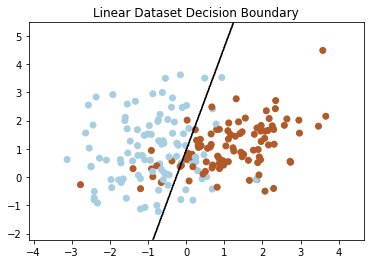

Linear Dataset Accuracy: 0.8666666666666667


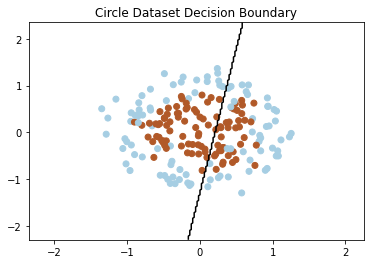

Circle Dataset Accuracy: 0.4166666666666667


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 生成线性可分数据集
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 生成环形数据集
X_circle, y_circle = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)

def plot_decision_boundary(X, y, model, title):
    h =.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 去除背景色
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, levels=[0.5], colors='k')
    plt.title(title)
    plt.show()

def test_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return model, accuracy

# 测试线性可分数据集
linear_model, linear_accuracy = test_model(X_linear, y_linear)
plot_decision_boundary(X_linear, y_linear, linear_model, "Linear Dataset Decision Boundary")
print(f"Linear Dataset Accuracy: {linear_accuracy}")

# 测试环形数据集
circle_model, circle_accuracy = test_model(X_circle, y_circle)
plot_decision_boundary(X_circle, y_circle, circle_model, "Circle Dataset Decision Boundary")
print(f"Circle Dataset Accuracy: {circle_accuracy}")